**Import Libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

**Some Notebook Settings.**

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

**Check Encoding of Data.**

In [3]:
# # Check the encoding of data. Use ctrl+/ to comment/un-comment.

# import chardet

# rawdata = open('../input/database.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)
# print(result) # It's ascii with 100% confidence.

**Read Data.**

In [4]:
df = pd.read_csv('../input/database.csv', encoding='utf-8')
df.drop_duplicates(inplace=True) # drop duplicates if any.
df.shape # num rows x num columns.

(174104, 66)

<hr>

**Check for missing values.**

In [5]:
miss_val = (df.isnull().sum()/len(df)*100).sort_values(ascending=False) # columns and their missing values in percentage.
miss_val[miss_val>0]

Injuries            99.87
Fatalities          99.68
Engine4 Position    98.22
Engine3 Position    93.30
Speed               59.07
Warning Issued      56.11
Precipitation       49.27
Flight Impact       42.87
Distance            42.73
Height              40.45
Visibility          36.86
Engine2 Position    31.81
Flight Phase        31.76
Engine Model        29.93
Aircraft Model      29.67
Engine Make         29.10
Engine1 Position    27.52
Engine Type         26.89
Aircraft Mass       26.87
Engines             26.86
Aircraft Make       24.73
Aircraft Type       23.57
State               12.62
FAA Region          10.86
Species Quantity     2.57
Airport              0.17
Species Name         0.05
dtype: float64

**Take a look at the data.**

In [6]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Year vs Incident.**

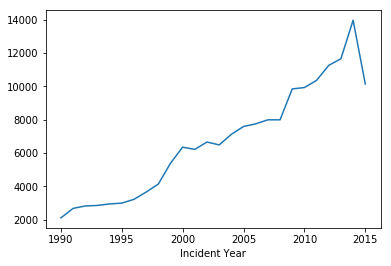

In [7]:
df.groupby('Incident Year').size().plot()

It seems that the incidents keep on increasing every year. But, this might not be the case.<br>
*"Awareness in terms of reporting wildlife incidents has increased over time, as has the ease of reporting, due to advances in telecommunications. This means that although the number of records has increased over the years, this does not necessarily indicate a true increase in the number of incidents that have occurred."* -> https://aertecsolutions.com/2019/02/04/the-impact-of-wildlife-on-aviation/?lang=en

**Month vs Incident.**

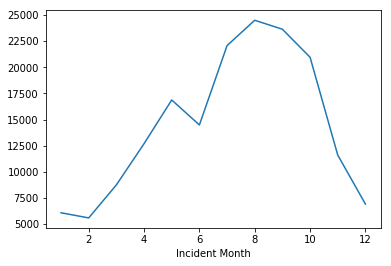

In [8]:
df.groupby('Incident Month').size().plot()

It seems that Jul-Aug-Sep in particular see maximum incidents.

<hr>

**Chi-Square Test of Independence.**

Let us check using chi-square test of independence, whether Aircraft Strikes and Incident Month are independent.

Below is a list of column names. These columns are categorical with 0-1 binary values. They record if a particular part of Aircraft udergo strike with wildlife or not.

In [9]:
strike = ['Radome Strike', 'Windshield Strike', 'Nose Strike', 'Engine1 Strike', 'Engine2 Strike', 'Engine3 Strike',
          'Engine4 Strike', 'Propeller Strike', 'Wing or Rotor Strike', 'Fuselage Strike', 'Landing Gear Strike',
          'Tail Strike', 'Lights Strike', 'Other Strike']

**Freuency Table.**

In [10]:
table = df.groupby('Incident Month')[strike].sum()
table # Incident Month vs Strike.

,Radome Strike,Windshield Strike,Nose Strike,Engine1 Strike,Engine2 Strike,Engine3 Strike,Engine4 Strike,Propeller Strike,Wing or Rotor Strike,Fuselage Strike,Landing Gear Strike,Tail Strike,Lights Strike,Other Strike
Incident Month,,,,,,,,,,,,,,
1,590,709,628,437,381,42,20,147,905,621,401,96,65,607
2,546,585,596,348,326,21,15,144,812,564,353,95,57,524
3,888,1117,1014,602,495,29,16,195,1285,932,478,143,69,768
4,1452,1873,1629,684,590,44,32,219,1621,1408,574,160,81,1159
5,2104,2707,2232,837,672,53,29,263,1841,1930,626,146,69,1395
6,1267,1733,1504,676,553,54,25,237,1364,1278,663,107,59,1501
7,1984,2689,2399,1030,820,48,36,433,2074,1892,954,160,93,2248
8,2479,3491,3062,1187,948,67,37,527,2548,2325,1011,216,125,2361
9,2876,3684,3121,1304,1024,62,41,487,2783,2567,965,214,153,1860


In [11]:
(table.sum(axis=0) # column sum.
,table.sum(axis=1)) # row sum.

(Radome Strike           18761
 Windshield Strike       24189
 Nose Strike             21305
 Engine1 Strike           9681
 Engine2 Strike           7864
 Engine3 Strike            554
 Engine4 Strike            334
 Propeller Strike         3497
 Wing or Rotor Strike    20746
 Fuselage Strike         17881
 Landing Gear Strike      8051
 Tail Strike              1956
 Lights Strike            1038
 Other Strike            15796
 dtype: int64, Incident Month
 1      5649
 2      4986
 3      8031
 4     11526
 5     14904
 6     11021
 7     16860
 8     20384
 9     21141
 10    19391
 11    11283
 12     6477
 dtype: int64)

In [12]:
table.sum(axis=0).sum(), table.sum(axis=1).sum() # sum of all rows and all columns.

(151653, 151653)

Sum of all rows and all columns of table are equal, as expected.

Now, lets find the minimum frequencies in the table.

In [13]:
df.groupby('Incident Month')[strike].sum().min()

Radome Strike           546
Windshield Strike       585
Nose Strike             596
Engine1 Strike          348
Engine2 Strike          326
Engine3 Strike           21
Engine4 Strike           15
Propeller Strike        144
Wing or Rotor Strike    812
Fuselage Strike         564
Landing Gear Strike     353
Tail Strike              95
Lights Strike            57
Other Strike            524
dtype: int64

The frequencies of groupmust be greater than or equal to 5. That is the case here. Thus, we can proceed with the test.

**Hypothesis and test.**

Null Hypothesis,      H0: Incident month and Aircraft Strike are independent of each other.<br>
Alternate Hypothesis, H1: Incident month and Aircraft Strike are not independent of each other.

In [14]:
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(table)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
pd.DataFrame(ex)

===Chi2 Stat===
2196.2409322657622


===Degrees of Freedom===
143


===P-Value===
0.0


===Contingency Table===


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,698.84,901.03,793.60,360.61,292.93,20.64,12.44,130.26,772.78,666.06,299.90,72.86,38.66,588.39
1,616.82,795.28,700.46,318.29,258.55,18.21,10.98,114.97,682.08,587.89,264.70,64.31,34.13,519.34
2,993.52,1280.96,1128.24,512.67,416.45,29.34,17.69,185.19,1098.63,946.91,426.35,103.58,54.97,836.50
3,1425.88,1838.42,1619.23,735.78,597.68,42.11,25.38,265.78,1576.75,1359.00,611.90,148.66,78.89,1200.53
4,1843.77,2377.22,2093.79,951.42,772.85,54.45,32.82,343.67,2038.85,1757.29,791.23,192.23,102.01,1552.38
5,1363.41,1757.87,1548.29,703.54,571.50,40.26,24.27,254.14,1507.66,1299.46,585.09,142.15,75.43,1147.93
6,2085.75,2689.21,2368.58,1076.28,874.28,61.59,37.13,388.78,2306.43,1987.92,895.07,217.46,115.40,1756.12
7,2521.71,3251.29,2863.65,1301.24,1057.02,74.46,44.89,470.04,2788.51,2403.42,1082.15,262.91,139.52,2123.17
8,2615.35,3372.04,2970.00,1349.57,1096.27,77.23,46.56,487.49,2892.07,2492.68,1122.34,272.67,144.70,2202.02
9,2398.86,3092.91,2724.15,1237.85,1005.52,70.84,42.71,447.14,2652.67,2286.34,1029.44,250.10,132.72,2019.74


p-value is 0 (<0.01). This means that Null hypothesis is rejected at 1% level of significance.<br>
This means that Incident month and Aircraft Strike are infact not independent from each other.

<hr>